<a href="https://colab.research.google.com/github/pawanGithub10/MachineLearning/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network From Scratch

In [14]:
import numpy as np
import pandas as pd
import math as m
import scipy.special
import matplotlib.pyplot as plt


In [15]:
#Neural Network Class Definition

class NeuralNetowrk:

  #Initialize the neural network
  def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
    #Set the number of nodes in each input,hidden,output layer
    self.inodes  = inputnodes
    self.hnodes  = hiddennodes
    self.onodes  = outputnodes  

    #Weights Matrix Initilization
    self.wih = np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
    self.who = np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))

    #learning rate
    self.lr = learningrate

    #Activation function is the sigmoid function
    self.activation_function = lambda x:scipy.special.expit(x)
    pass

  #Train the neural network
  def train(self,inputs_list,targets_list):
    #Convert inputs list to a 2d array
    inputs = np.array(inputs_list,ndmin=2).T

    #Convert the Output list to a 2D array
    target_outputs = np.array(targets_list,ndmin=2).T

    #Calculate Signals into output layer
    hidden_layer_output = self.activation_function(np.dot(self.wih,inputs))

    #Calculate the Output
    final_layer_output = self.activation_function(np.dot(self.who,hidden_layer_output))
    
    #Error is the Actual-Target
    output_errors = target_outputs-final_layer_output
    
    #Weight Update between the hidden layer and the output layer
    self.who+=self.lr*np.dot((output_errors*final_layer_output*(1-final_layer_output))
                                      ,np.transpose(hidden_layer_output))

    #Hidden Layer Erros
    hidden_errors = np.dot(self.who.T,output_errors)

    #Weight update between the input layer and the hidden layer
    self.wih+=self.lr*np.dot(
                                  (hidden_errors*hidden_layer_output*(1-hidden_layer_output)),
                                    np.transpose(inputs))

    pass


  #query the neural network
  def query(self,input_list):
    #Conert the input list to 2d array
    inputs = np.array(input_list,ndmin= 2).T

    #Calculate signals into hidden layer
    hidden_inputs = np.dot(self.wih,inputs)

    #Calculate the signals emergin from the hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)

    #Calculate signals into final output layer
    final_inputs = np.dot(self.who,hidden_outputs)

    #Calculate the signals emerging from final output layer
    final_outputs = self.activation_function(final_inputs)

    return final_outputs

In [16]:
#Nodes in the network
input_nodes = 784
hidden_nodes = 400
output_nodes = 10

#Learning rate is .3
learning_rate = 0.3

#Create instance of the neural network
n = NeuralNetowrk(input_nodes,hidden_nodes,output_nodes,learning_rate)
#n.query([0.2,0.1,0.4])

In [17]:
data_file = open("/content/drive/My Drive/Colab Notebooks/dataset/MNIST/mnist_train.csv",'r')
data_list = data_file.readlines()
data_file.close()
print("total_data "+str(len(data_list)))
data_list[0]

total_data 60000


'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [18]:
onodes = 10
epochs=5
for e in range(epochs):
  for record in data_list:
    all_values = record.split(',')
    scaled_input = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    targets = np.zeros(onodes)+.01
    targets[int(all_values[0])] = 0.99 
    n.train(scaled_input,targets)

In [19]:
#scaled_input = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
#print(scaled_input)

In [20]:
test_data_file = open("/content/drive/My Drive/Colab Notebooks/dataset/MNIST/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [21]:
#Get the first test record
all_values = test_data_list[2].split(',')
#Print the label
print(all_values[0])

1


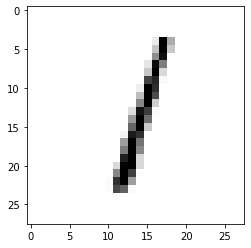

In [22]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap='Greys',interpolation='None')

In [23]:
n.query(np.asfarray(all_values[1:])/255.0*0.99) + .01

array([[0.02115483],
       [1.00736393],
       [0.0121553 ],
       [0.01215249],
       [0.02158112],
       [0.01403964],
       [0.01104089],
       [0.01098213],
       [0.01161797],
       [0.01332003]])

In [24]:
# test the neural network
# scorecard for how well the network performs, initially empty
scorecard = []
#Go through all the records in the test data set
for record in test_data_list:
  #Split the record by the ',' commas
  all_values = record.split(',')
  #Correct answer is the first value
  correct_label = int(all_values[0])
  print(correct_label,"Correct Label")
  #Scale and Shif the input
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  # query the network
  outputs = n.query(inputs)
  # the index of the highest value corresponds to the label
  label = np.argmax(outputs)
  print(label, "network's answer")
  # append correct or incorrect to list
  if (label == correct_label):
    # network's answer matches correct answer, add 1 to
    scorecard.append(1)
  else:
    scorecard.append(0)
    
  pass

Streaming output truncated to the last 5000 lines.
8 network's answer
3 Correct Label
3 network's answer
8 Correct Label
8 network's answer
6 Correct Label
6 network's answer
7 Correct Label
7 network's answer
0 Correct Label
0 network's answer
0 Correct Label
0 network's answer
1 Correct Label
1 network's answer
2 Correct Label
2 network's answer
3 Correct Label
3 network's answer
4 Correct Label
4 network's answer
5 Correct Label
0 network's answer
6 Correct Label
6 network's answer
7 Correct Label
7 network's answer
8 Correct Label
8 network's answer
9 Correct Label
9 network's answer
0 Correct Label
0 network's answer
1 Correct Label
1 network's answer
2 Correct Label
2 network's answer
3 Correct Label
3 network's answer
4 Correct Label
4 network's answer
5 Correct Label
5 network's answer
6 Correct Label
6 network's answer
7 Correct Label
7 network's answer
8 Correct Label
8 network's answer
9 Correct Label
9 network's answer
0 Correct Label
0 network's answer
1 Correct Label
1 ne

In [25]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [26]:
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() /
scorecard_array.size)

performance =  0.9529
